In [8]:
# PASO 1 - Importamos las librerias
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

In [9]:
# Cargamos Iris
iris=load_iris()

In [10]:
# PASO 2 - Creamos variables de intrenamiento
X_entrenamiento, X_test, y_entrenamiento, y_test=train_test_split(iris.data, iris.target)
print(len(X_entrenamiento))
print(len(X_test))
print("Porcentaje de datos de entrenamiento: ", len(X_entrenamiento)*100/(len(X_entrenamiento)+len(X_test)))
print("Porcentaje de datos de prueba: ", len(X_test)*100/(len(X_entrenamiento)+len(X_test)))

112
38
Porcentaje de datos de entrenamiento:  74.66666666666667
Porcentaje de datos de prueba:  25.333333333333332


In [11]:
# PASO 3 - Indicamos profundidad del arbol
arbol=DecisionTreeClassifier(max_depth=3)

In [12]:
# Le pasamos datos de entrenamiento
arbol.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeClassifier(max_depth=3)

In [13]:
# PASO 4 - Realizamos la prediccion
arbol.score(X_test, y_test)

0.9210526315789473

In [14]:
arbol.score(X_entrenamiento, y_entrenamiento)

0.9910714285714286

In [15]:
# PASO 5 - Graficamos
export_graphviz(arbol, out_file='arbol1.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=False, filled=True)

In [16]:
import os
os.environ["PATH"] += os.pathsep + "C:\Program Files\Graphviz\bin\dot.exe"

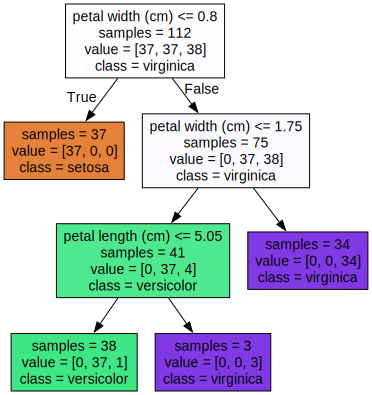

In [17]:
with open('arbol1.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

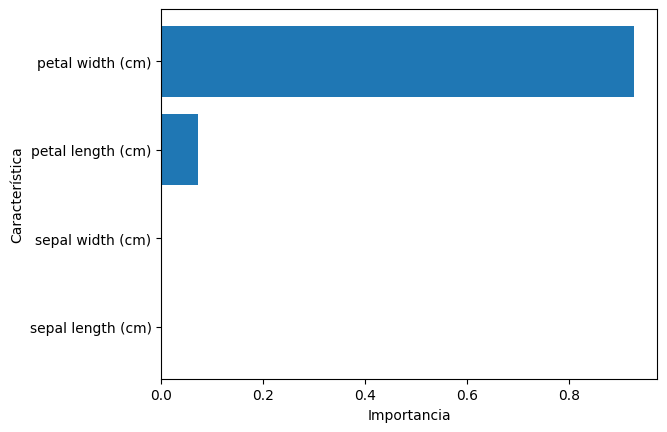

In [18]:
# PASO 6 - Analisis del resultado
caracteristica=iris.data.shape[1]

plt.barh(range(caracteristica),arbol.feature_importances_)
plt.yticks(np.arange(caracteristica),iris.feature_names)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()